<a href="https://colab.research.google.com/github/safayetsawom/pytorch_deeplearning_practice/blob/main/basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#https://gist.github.com/curran/a08a1080b88344b0c8a7 (dataset)

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F #for forwarding the functions in neural network
import torch.optim as optim

In [85]:
#create a model class that inherits nn.module
class Model(nn.Module):
  #input layer(4 features of the flower)-->
  #hidden layer1 (number of neurons)
  #h2(n)--> forwarding it
  #output(3 classes of iris flower)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))  #rektified linear unit , if more than 0 then it's the ans. if less than 0 then make it 0
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [86]:
#pick a manual seed for randomization
torch.manual_seed(41)
model=Model() #create an instance model.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
df['species']=df['species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})
df.tail()

<ipython-input-89-432080fdee0c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [90]:
#train test split! set x,y
X=df.drop('species',axis=1).values
y=df['species'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [91]:
#convert X features to float tensors
X_test=torch.FloatTensor(X_test)
X_train=torch.FloatTensor(X_train)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [92]:
#set the criterion of model to measure the error, how far off the predictions are from the real
criterion=nn.CrossEntropyLoss()
#choose adam optimizer, lr=learningrate if error doesn't go down after a bunch of iteration then we lower it
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [93]:
epochs=100
losses=[]
for i in range(epochs):
  i+=1
  y_pred=model.forward(X_train) #get predicted results
  loss=criterion(y_pred,y_train) #measure the loss/error, gonna be high at first- predicted values vs the y_train
  losses.append(loss) #keep track of our losses
  if i%10==0:
    print(f'epoch:{i} loss:{loss}')
  #do some back propagation and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:10 loss:1.0227365493774414
epoch:20 loss:0.8407701253890991
epoch:30 loss:0.6065686345100403
epoch:40 loss:0.4162401556968689
epoch:50 loss:0.27880606055259705
epoch:60 loss:0.18659552931785583
epoch:70 loss:0.12621845304965973
epoch:80 loss:0.08876660466194153
epoch:90 loss:0.06682577729225159
epoch:100 loss:0.0538492351770401


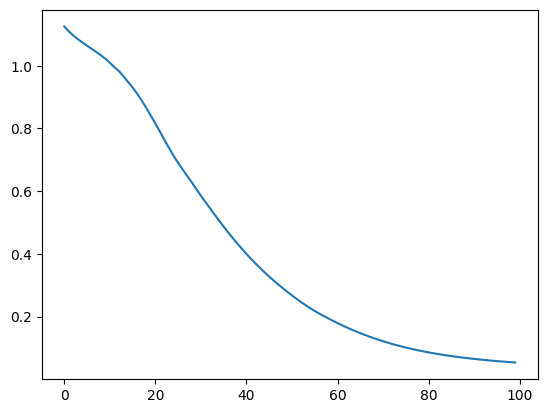

In [94]:
import matplotlib.pyplot as plt

# Assuming 'epochs' is the number of epochs and 'losses' is a list of loss values for each epoch
# Assume 'tensor' is the tensor causing the error
plt.plot(range(epochs), [loss.item() for loss in losses])

In [95]:
#evaluate the model on test data set and validate the model on test set
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss=criterion(y_eval,y_test)
print(f'loss:{loss}')

loss:0.13151279091835022


In [96]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)
    #will tell use what kind of flower class our network thinks it it
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]} \t {y_val.argmax().item()}') #1:2, "38 is space for better alignment"
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-5.8760,  4.4628,  6.5124])    2 	 2
 2. tensor([-7.5436,  4.1670,  9.7255])    2 	 2
 3. tensor([-8.4504,  5.1271, 10.1987])    2 	 2
 4. tensor([-4.3398,  5.6267,  2.5608])    1 	 1
 5. tensor([-7.1825,  4.8754,  8.2992])    2 	 2
 6. tensor([-3.3974,  5.3463,  1.2803])    1 	 1
 7. tensor([-5.9231,  4.9822,  5.9997])    2 	 2
 8. tensor([-4.2881,  5.7003,  2.3889])    1 	 1
 9. tensor([-6.5356,  4.9257,  7.1260])    2 	 2
10. tensor([-8.0509,  4.4129, 10.3286])    2 	 2
11. tensor([-5.6762,  4.9500,  5.6215])    2 	 2
12. tensor([ 4.5662, -2.2476, -2.8911])    0 	 0
13. tensor([ 4.2571, -1.9967, -2.7330])    0 	 0
14. tensor([-2.1108,  4.0515,  0.5799])    1 	 1
15. tensor([ 3.4575, -1.2098, -2.3514])    0 	 0
16. tensor([-5.4724,  5.1165,  5.0934])    2 	 1
17. tensor([ 4.0557, -1.7949, -2.6492])    0 	 0
18. tensor([-5.8075,  4.6053,  6.2458])    1 	 2
19. tensor([ 4.4343, -2.1392, -2.8242])    0 	 0
20. tensor([ 3.4528, -1.2514, -2.3660])    0 	 0
21. tensor([-2.6189,

In [97]:
#if we had to add another features and get the name of the flower species
new_iris=torch.tensor([5.6,3.7,2.2,1.5]) #features values
with torch.no_grad():
  print(model(new_iris))

tensor([ 0.3409,  1.8012, -0.6975])


In [98]:
#save NN model
torch.save(model.state_dict(),'model.pt') # 'model.pt' is the key to be saved

In [99]:
#load the saved model
new_model=Model()
new_model.load_state_dict(torch.load('model.pt'))

<ipython-input-99-dfb18181131c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [100]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)